<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/ML_Prediccion_Protein_Family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 1. Analítica predictiva
## Evidencia de Aprendizaje 1. Analítica predictiva y planteamiento de problemas

Objetivo:
Definir e implementar un problema que parta de una necesidad de alguna entidad, industria o situación de la vida real que pueda ser solucionado por medio de analítica de datos.

# Contexto del Negocio:

[Bioinformatics Industry Overview](<a href='https://www.mordorintelligence.com/industry-reports/global-bioinformatics-market-industry'>
<img
alt='Bioinformatics Market Size & Share Analysis - Growth Trends & Forecasts (2023 - 2028)'
src='https://s3.mordorintelligence.com/global-bioinformatics-market-industry/1668144804432_global-bioinformatics-market-industry_Bioinformatics_Market_-_Growth_Rate_by_Region.png?embed=true'>
</a>
<br/>

Los objetivos principales de la Bioinformática son (1) gestionar los datos de manera que permita un fácil acceso a la información existente y la incorporación de nuevas entradas a medida que se produzcan; (2) desarrollar herramientas tecnológicas que ayuden a analizar datos biológicos; y (3) utilizar estas herramientas para analizar los datos e interpretar los resultados desde una perspectiva biológica.

Industria del Negocio: Farmaceutica,Ciencias Biologicas, Medicina..

Problema del Negocio: Clasificar una familia de proteinas a partir de una secuencia de aminiacidos a traves de un modelo de ML y comparar sus resutlados con lo motores de busqueda existentes BLAST.

[Brochure](https://show.zohopublic.com/publish/m9dnr4da41df4d3714f328d1ff7794ea82869)

ORIGEN DE LOS DATOS
Este conjunto de datos ha sido descargado de RCSB PDB y amablemente reconocido.

Los datos originales pueden descargarse de [ORIGEN
](http://www.rcsb.org/pdb/
)

Se trata de un conjunto de datos de proteínas recuperados del Banco de Datos de Proteínas (PDB) del Research Collaboratory for Structural Bioinformatics (RCSB).

El archivo PDB es un repositorio de coordenadas atómicas y otra información que describe proteínas y otras macromoléculas biológicas importantes. Los biólogos estructurales utilizan métodos como la cristalografía de rayos X, la espectroscopia de RMN y la criomicroscopía electrónica para determinar la ubicación de cada átomo en relación con los demás en la molécula.

pdb_data_no_dups.csv contiene metada de las proteinas como tipo, familia, metodo de extraccion, densiad, ph, electronegatividad.

data_seq.csv Contiene >400,000 secuencias de proteinas


# 1.Preparacion del entorno de trabajo.

In [168]:
## Cargando las librerias

## Manupulacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Vizualizacion
from matplotlib import pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## --------------

# Import Datasets
df_seq = pd.read_csv('/content/pdb_data_seq.csv')
df_char = pd.read_csv('/content/pdb_data_no_dups.csv')

print('Datasets have been loaded...')

Datasets have been loaded...


# 2.Procesamiento de datos y filtrado

In [169]:
# 2). ----- FILTRAR Y PROCESAS EL DATA SETT ------

# Filtrar solo las proteinas
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']


EL analisis comprende el uso de dos data sett denominados "PROTEIN_CHAR" Y "PROTEIN_SEP".Con los datos cargados en dos dataframes separados de pandas, es necesario realizar un filtro, una proyección y una unión para obtener los datos juntos, la libreria pandas ofrece una forma de realizar estos comandos similares a SQL.

## Protein_Char

Data set que contien la propiedades fisicas de varios proteinas , lipidos y otras macromoleculas(rna) compuesto por 14 atributos.

In [170]:
protein_char.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [171]:
protein_char.describe(include="all")

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
count,127798,127797,127798,127798,127798.000000,117008.000000,1.277980e+05,87667,88638.000000,114341.000000,114362.000000,108296,95902.000000,105931.000000
unique,127387,4468,29,1,NaN,NaN,NaN,526,NaN,NaN,NaN,84469,NaN,NaN
top,1UJQ,HYDROLASE,X-RAY DIFFRACTION,Protein,NaN,NaN,NaN,"VAPOR DIFFUSION, HANGING DROP",NaN,NaN,NaN,pH 7.5,NaN,NaN
freq,4,20425,115438,127798,NaN,NaN,NaN,48893,NaN,NaN,NaN,346,NaN,NaN
mean,NaN,NaN,NaN,NaN,721.049046,2.208678,8.955848e+04,NaN,291.000731,2.652620,51.113914,NaN,6.786939,2009.044746
std,NaN,NaN,NaN,NaN,1741.791584,1.339638,4.690485e+05,NaN,8.764264,0.687323,10.011235,NaN,1.307179,8.521400
min,NaN,NaN,NaN,NaN,3.000000,0.480000,4.535500e+02,NaN,4.000000,0.000000,0.000000,NaN,0.000000,201.000000
25%,NaN,NaN,NaN,NaN,237.000000,1.780000,2.672429e+04,NaN,290.000000,2.210000,44.160000,NaN,6.000000,2005.000000
50%,NaN,NaN,NaN,NaN,416.000000,2.040000,4.706000e+04,NaN,293.000000,2.480000,50.200000,NaN,7.000000,2010.000000
75%,NaN,NaN,NaN,NaN,800.000000,2.490000,9.102404e+04,NaN,295.000000,2.890000,57.320000,NaN,7.500000,2014.000000


In [172]:
protein_char.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

In [173]:
protein_char.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
dtype: object

In [174]:
protein_char.isnull().sum()

structureId                     0
classification                  1
experimentalTechnique           0
macromoleculeType               0
residueCount                    0
resolution                  10790
structureMolecularWeight        0
crystallizationMethod       40131
crystallizationTempK        39160
densityMatthews             13457
densityPercentSol           13436
pdbxDetails                 19502
phValue                     31896
publicationYear             21867
dtype: int64

## Data set protein_seq
data ser compuesto por 2 atributos  conformato por el tipo de estructura terciaria (structureid) y su secuencia de aminoaciados (Sequence).

In [175]:
# data set 1
protein_seq.head(5)

,structureId,chainId,sequence,residueCount,macromoleculeType
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [176]:
# data set 2
protein_char.head(5)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


Seleccionando variables a unir en los dos data set a partir de las columnas ['structureId','sequence'], se procede para crear un nuevo data set denominado model_f

In [177]:
# Seleccionando variables a unir en los dos data set(1 y 2) a partir de las columnas ['structureId','sequence']
protein_char = protein_char[['structureId','classification','residueCount', 'resolution',
       'structureMolecularWeight','crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']]
protein_seq = protein_seq[['structureId','sequence']]
protein_seq.head()

,structureId,sequence
4,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [178]:
# Uniendo ambos data set en un nuevo mas esturcutrado
model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f.head()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
structureId,,,,,,,,,
101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [179]:
# descripcion del nuevo data set el cual es un join de data set 1 y data set 2.
model_f.describe(include="all")

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
count,346324,346325.000000,330232.000000,3.463250e+05,243934.000000,307481.000000,307615.000000,259130.000000,346322
unique,4468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89083
top,HYDROLASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...
freq,46336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580
mean,NaN,4708.536765,2.716206,5.516918e+05,291.243141,2.760855,52.817512,6.801273,NaN
std,NaN,26484.160063,3.083736,3.129940e+06,8.498793,0.738698,10.135556,1.344769,NaN
min,NaN,3.000000,0.480000,4.535500e+02,4.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,398.000000,1.900000,4.541398e+04,291.000000,2.280000,45.820000,6.000000,NaN
50%,NaN,856.000000,2.300000,9.703276e+04,293.000000,2.570000,52.000000,7.000000,NaN
75%,NaN,1976.000000,2.800000,2.253119e+05,295.000000,3.030000,59.380000,7.500000,NaN


 Se procede a realizar el EDA del nuevo data set uniificado

In [180]:
model_f.dtypes

classification               object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
phValue                     float64
sequence                     object
dtype: object

In [181]:
model_f.shape

(346325, 9)

In [182]:
print('%d es el numero de finlas unidas (join) en ambos data set' %model_f.shape[0])

346325 es el numero de finlas unidas (join) en ambos data set


Validando datos null en el data set.

In [183]:
# Validando datos nulos
model_f.isnull().sum()

classification                   1
residueCount                     0
resolution                   16093
structureMolecularWeight         0
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
phValue                      87195
sequence                         3
dtype: int64

Removiendo filas con datos nulos en un nuevo objeto model_f

In [184]:
# Drop rows con valores perdidos
model_f = model_f.dropna()
print('%d es el numero de proteinas que tienen una clasificacion de familia y secuencia' %model_f.shape[0])

214106 es el numero de proteinas que tienen una clasificacion de familia y secuencia


In [148]:
model_f.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
count,214106.000000,214106.000000,2.141060e+05,214106.000000,214106.000000,214106.000000,214106.000000
mean,1687.204945,2.304777,1.923286e+05,291.249320,2.757979,52.905880,6.806119
std,2744.148104,0.644257,3.353199e+05,8.707042,0.729410,9.971873,1.359278
min,5.000000,0.480000,4.885400e+02,4.000000,0.000000,0.000000,0.000000
25%,424.000000,1.900000,4.798316e+04,291.000000,2.270000,45.860000,6.000000
50%,840.000000,2.200000,9.526080e+04,293.000000,2.560000,52.010000,7.000000
75%,1752.000000,2.700000,1.965214e+05,295.000000,3.040000,59.520000,7.500000
max,57792.000000,9.010000,1.699046e+07,398.000000,12.700000,90.330000,100.000000


In [149]:
model_f.dtypes

classification               object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
phValue                     float64
sequence                     object
dtype: object

In [150]:
model_f.columns

Index(['classification', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews',
       'densityPercentSol', 'phValue', 'sequence'],
      dtype='object')

In [151]:
model_f.head(5)

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
structureId,,,,,,,,,
1914,ALU DOMAIN,232,2.53,26562.73,277.0,3.00,34.00,7.7,MASMTGGQQMGRIPGNSPRMVLLESEQFLTELTRLFQKCRSSGSVF...
1A04,SIGNAL TRANSDUCTION PROTEIN,430,2.20,47657.25,277.0,2.49,51.03,7.6,SNQEPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIEL...
1A04,SIGNAL TRANSDUCTION PROTEIN,430,2.20,47657.25,277.0,2.49,51.03,7.6,SNQEPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIEL...
1A07,COMPLEX (TRANSFERASE/PEPTIDE),222,2.20,25718.97,277.0,2.10,43.00,8.0,MDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYC...
1A07,COMPLEX (TRANSFERASE/PEPTIDE),222,2.20,25718.97,277.0,2.10,43.00,8.0,MDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYC...


Realizando el conteo de las proteinas con los criterios de inclusion.

In [185]:
counts = model_f.classification.value_counts()
print(counts)


HYDROLASE                               29726
TRANSFERASE                             24338
OXIDOREDUCTASE                          22578
IMMUNE SYSTEM                           11087
HYDROLASE/HYDROLASE INHIBITOR            9569
                                        ...  
DYE-BINDING PROTEIN                         1
CHAPERONE REGULATOR                         1
pyridoxal phosphate binding                 1
IMMUNE SYSTEM, LIPID BINDING PROTEIN        1
lipid transport/activator                   1
Name: classification, Length: 2458, dtype: int64


## Analisis Explotatorio de datos (EDA) data set model_f

Vizualizacion del data set a trabajar para el analisis exploratorio.

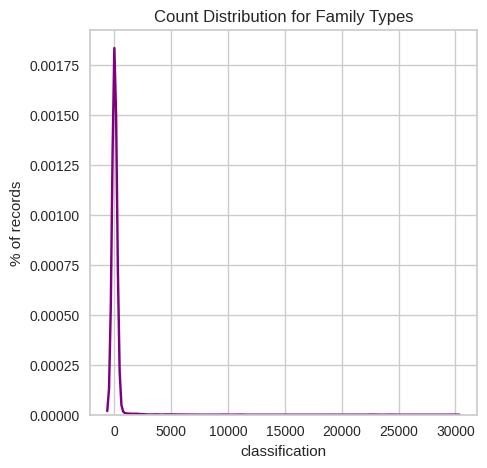

In [191]:
#plot counts
plt.figure(figsize=(5,5))
sns.distplot(counts, hist = False, color = 'purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()

Parece haber una amplia distribución de recuentos para los tipos de familia. Se considera como una buena idea filtrar el data por con uni minimo  de registros un tipo específico de familia. se usara un recuento minimo de  registros 1.000 parece un número sólido que permitirá a un modelo de aprendizaje automático, con ella toda familia con un menor menor a 1.000 sera filtrado de data set y no se usara para el entreanamiento del modelo.

Antes de seguir en el proceso, se realiza un analisis exploratorio de la distribucion de datos.

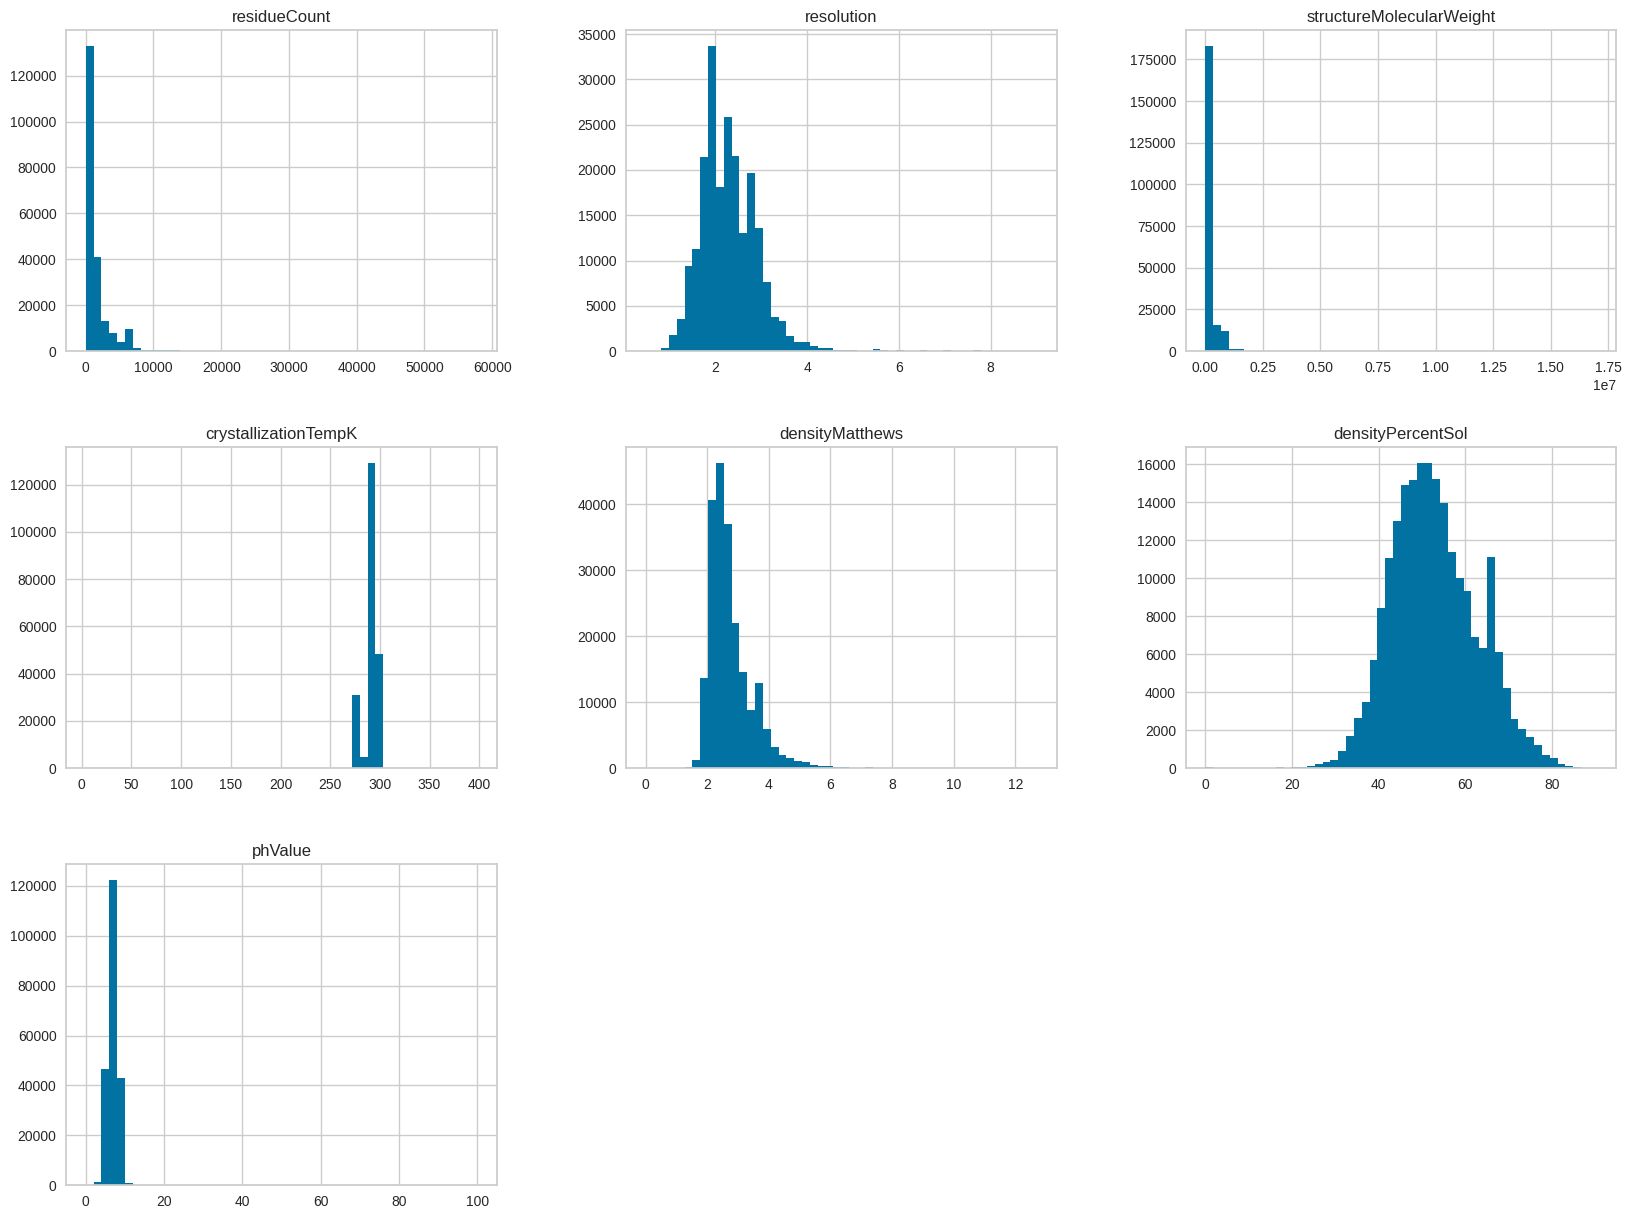

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
model_f.hist(bins=50, figsize=(20,15))
plt.show()

In [155]:
titulos=['residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews',
       'densityPercentSol', 'phValue']


Se realiza una visluzacion para observar la distrinucion de medidas estadisticas.

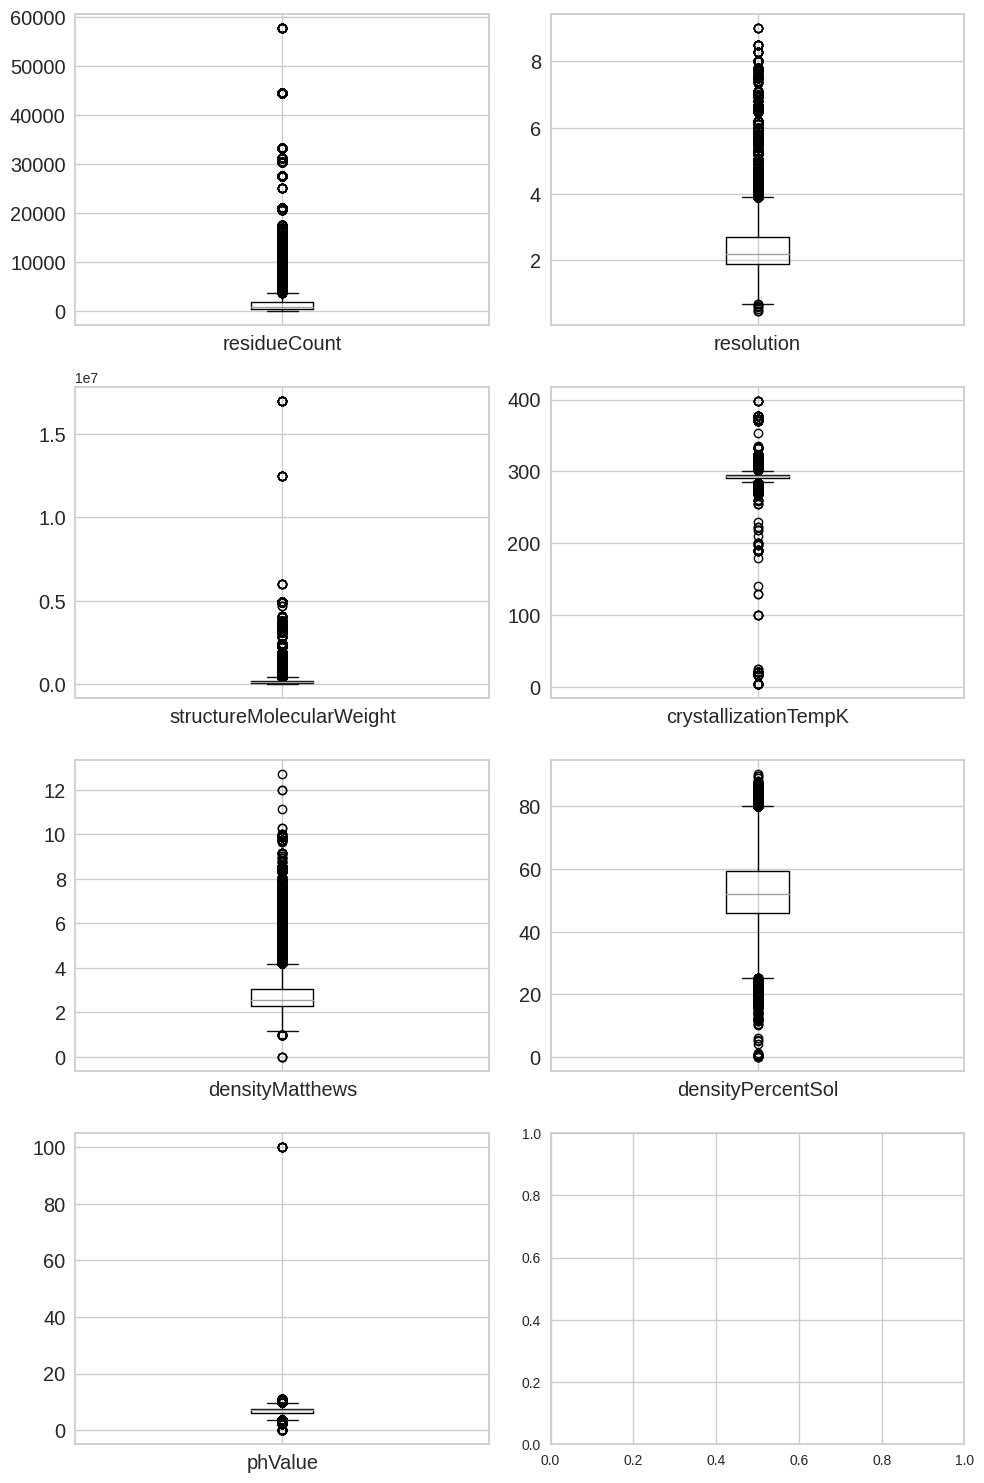

In [156]:
fig, axes = plt.subplots(4,2) # create figure and axes

for i, el in enumerate(list(model_f[titulos].columns.values)):
  a = model_f.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(10, 15)
plt.tight_layout()

plt.show()

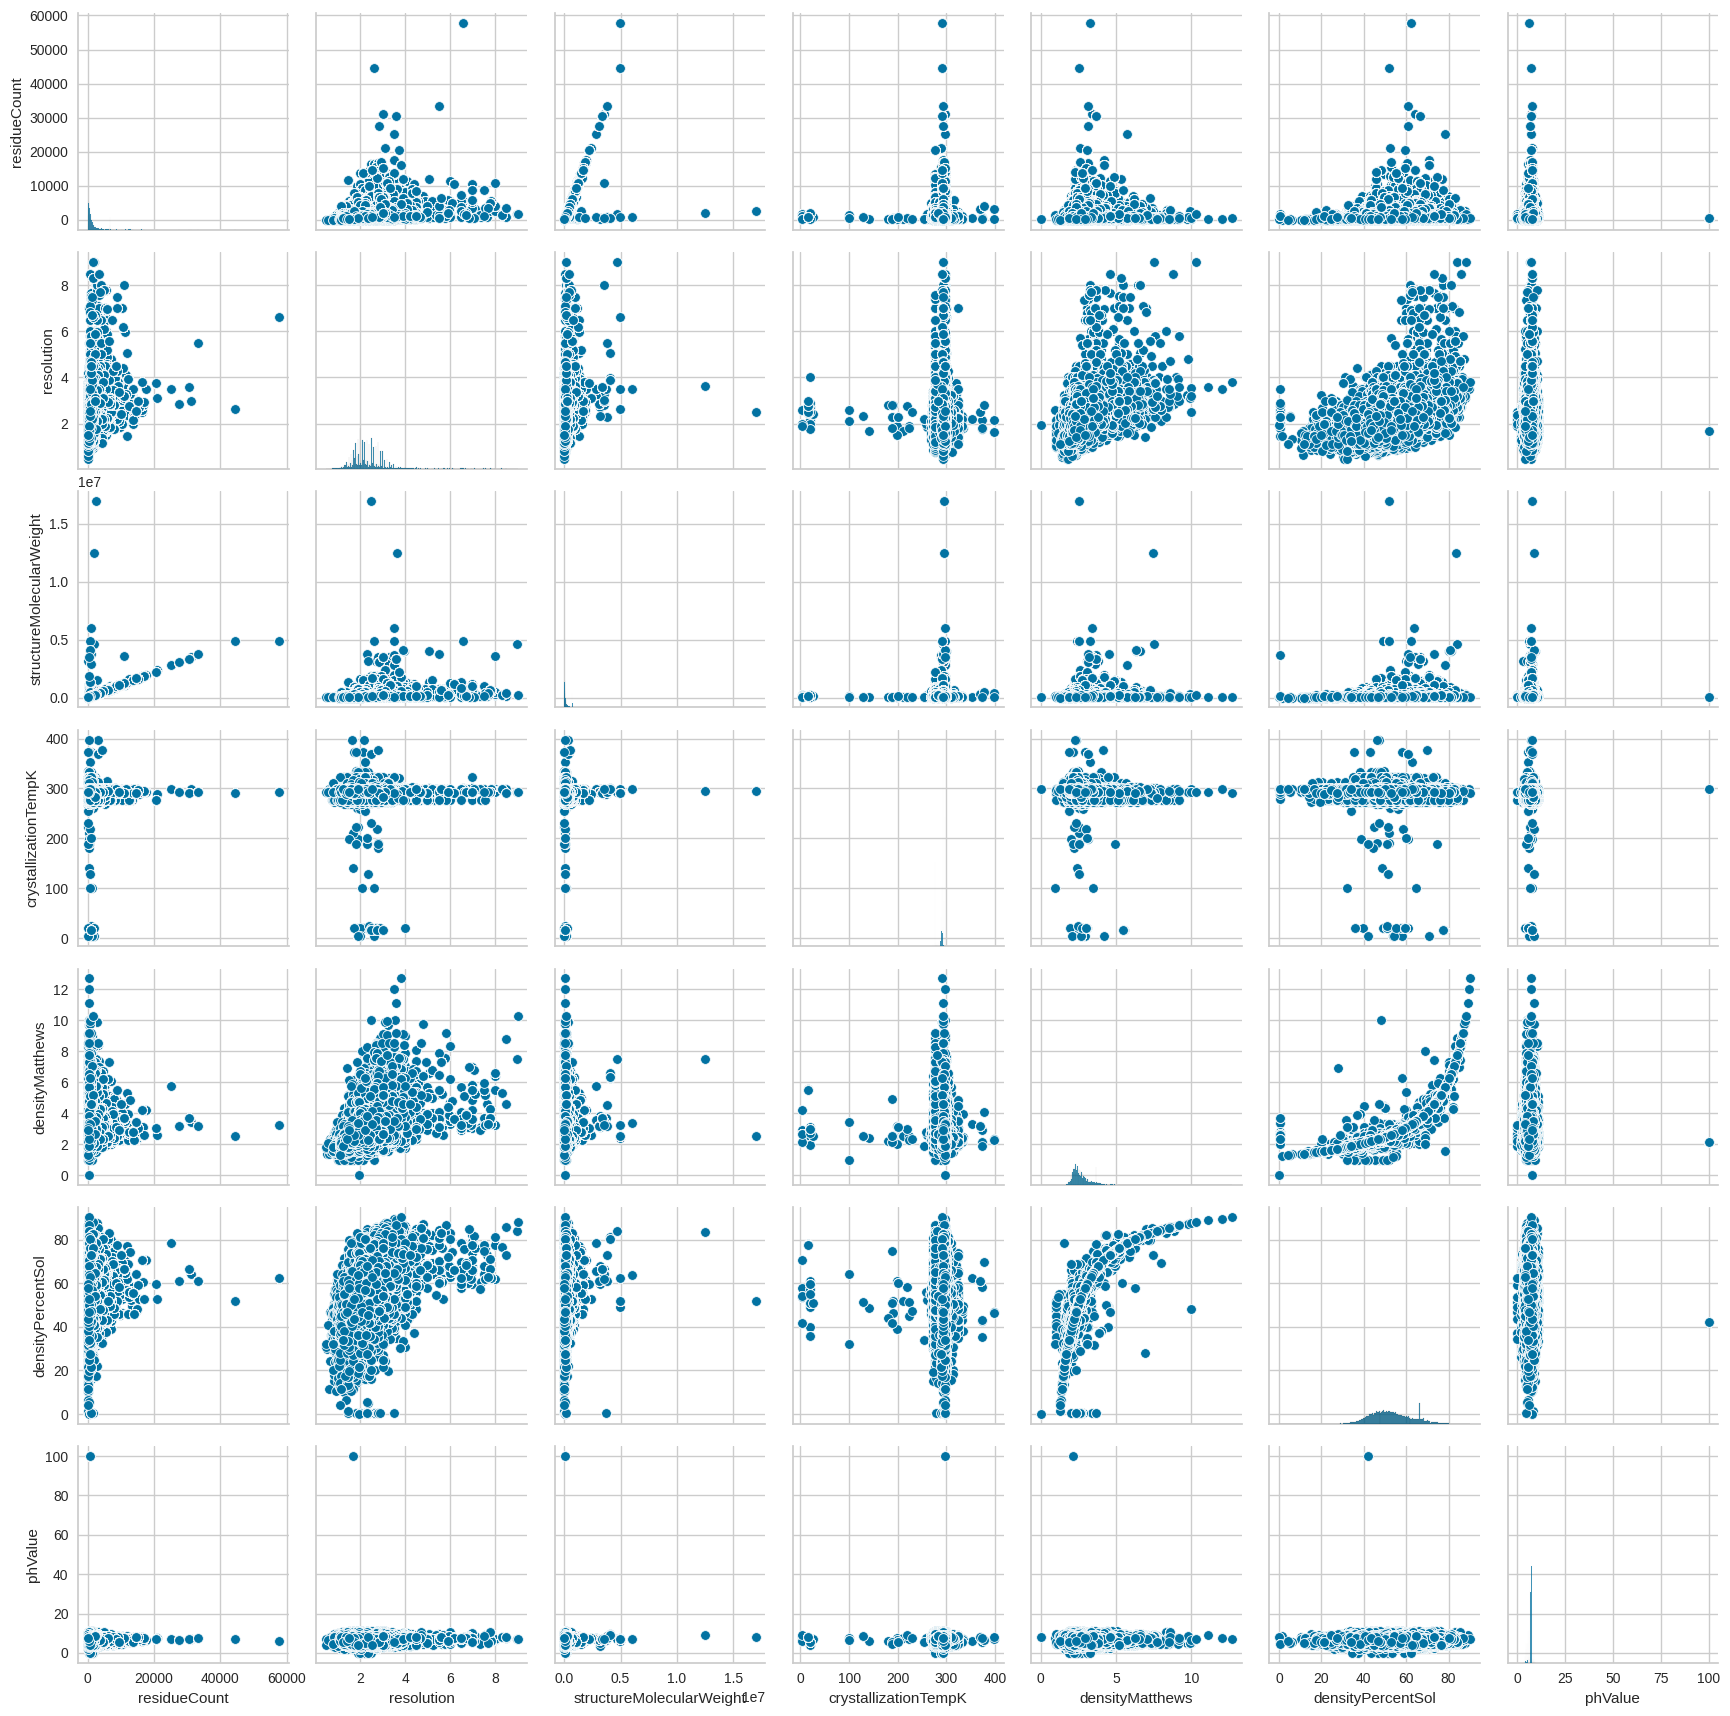

In [157]:
g = sns.PairGrid(model_f)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Se procede a filtrar el dataset, solo con aquellas proteinas que cuenten con mas de 1.000 registros,con anterior con el finde dar suficientes datos al modelo para entrenar

In [196]:
# Obtener tipos de clasificación con recuentos superiores a 1000
types = np.asarray(counts[(counts > 1000)].index)
print(len(types))
# Filtrar los registros del conjunto de datos para tipos de clasificación > 1000
data_m = model_f[model_f.classification.isin(types)]
data_m = data.drop_duplicates(subset=["classification","sequence"])  # leaving more rows results in duplciates / index related?

print(types)
print('%d es el numero de familias de proteinas(categorias) con mas de 1.000 registros en el data set dataset' %data.shape[0])

32
['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM'
 'HYDROLASE/HYDROLASE INHIBITOR' 'LYASE' 'TRANSCRIPTION'
 'TRANSPORT PROTEIN' 'ISOMERASE' 'VIRAL PROTEIN' 'SIGNALING PROTEIN'
 'LIGASE' 'PROTEIN BINDING' 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION'
 'TRANSFERASE/TRANSFERASE INHIBITOR' 'MEMBRANE PROTEIN'
 'SUGAR BINDING PROTEIN' 'UNKNOWN FUNCTION' 'DNA BINDING PROTEIN'
 'CHAPERONE' 'STRUCTURAL PROTEIN' 'METAL BINDING PROTEIN' 'CELL ADHESION'
 'ELECTRON TRANSPORT' 'PROTEIN TRANSPORT'
 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR' 'TOXIN' 'RNA BINDING PROTEIN'
 'CELL CYCLE' 'PHOTOSYNTHESIS' 'GENE REGULATION' 'DE NOVO PROTEIN']
46422 es el numero de familias de proteinas(categorias) con mas de 1.000 registros en el data set dataset


Eliminando duplicados , del data set con 46422  con mas de 1.000 registro.

In [197]:
## elimiando duplicados
data_m = data.drop_duplicates(subset=["classification","sequence"])
data_m.shape

(46422, 9)

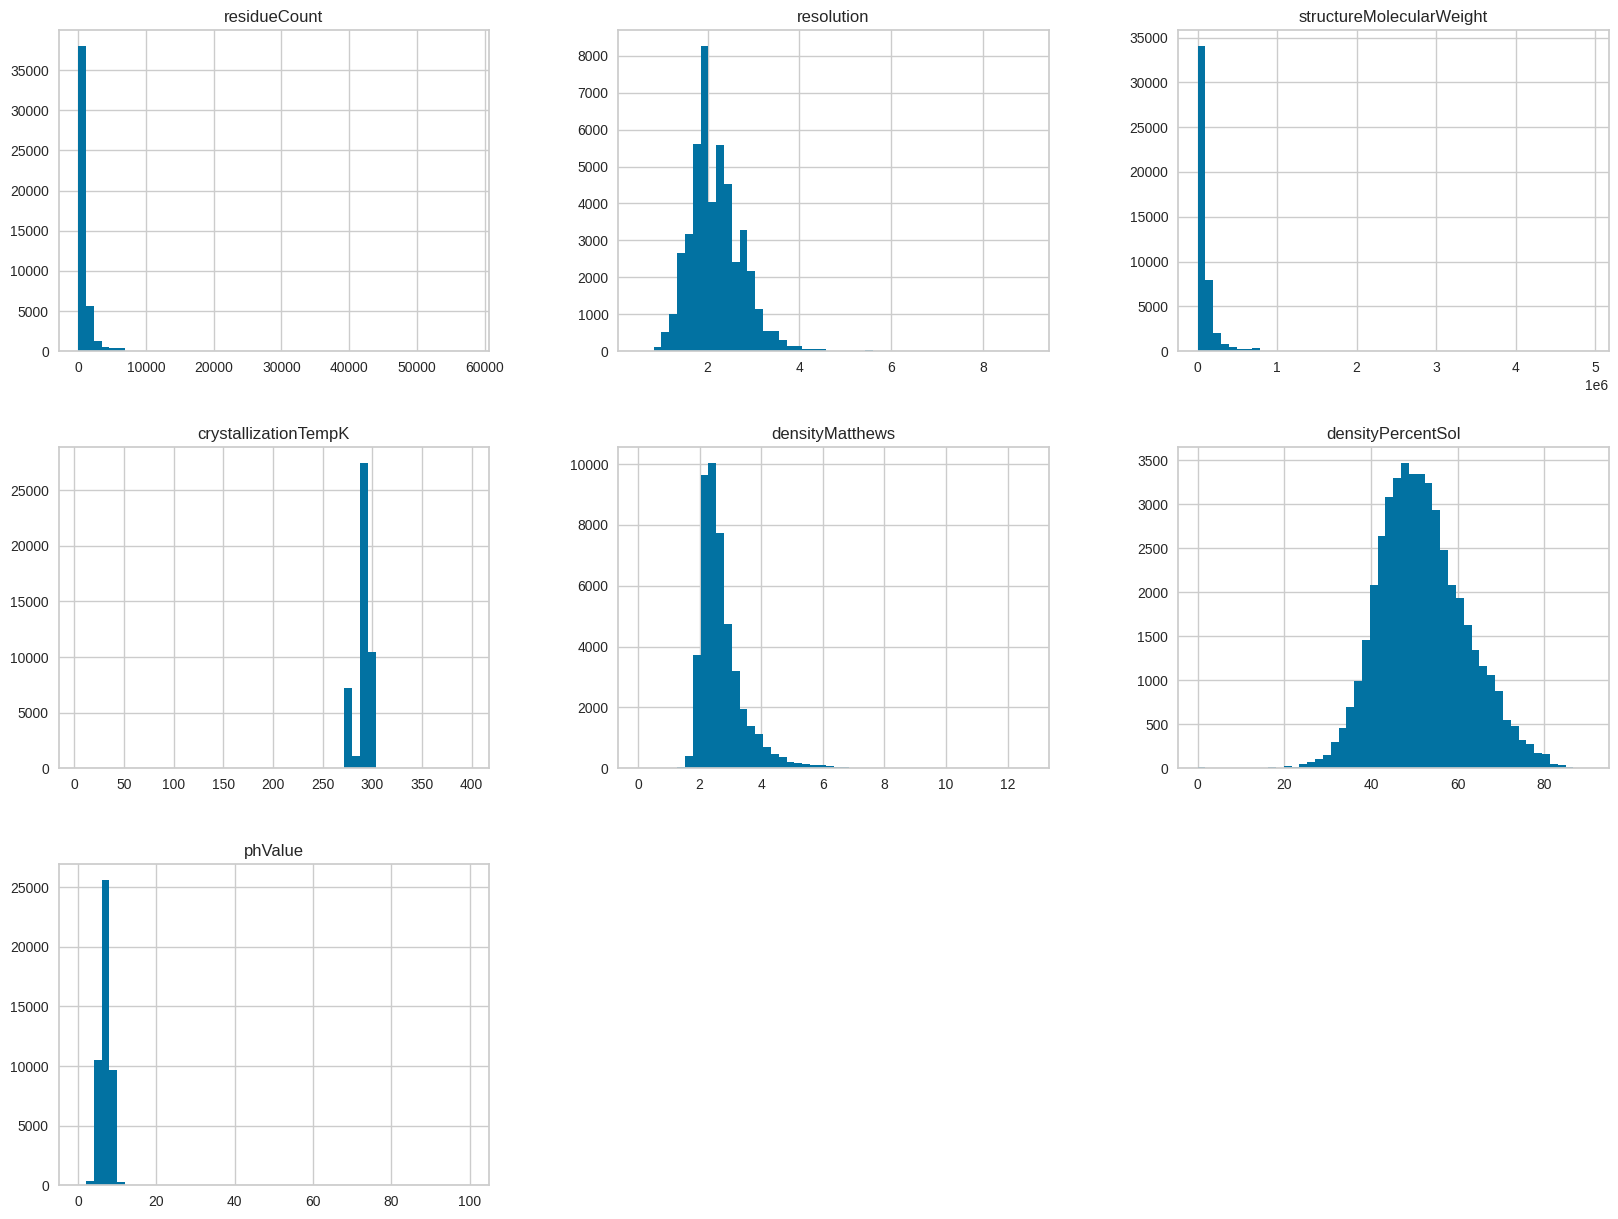

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
data_m.hist(bins=50, figsize=(20,15))
plt.show()

In [199]:
data_m.columns

Index(['classification', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews',
       'densityPercentSol', 'phValue', 'sequence'],
      dtype='object')

In [200]:
counts_2 = data_m.classification.value_counts()
print(counts_2)


HYDROLASE                                  8466
TRANSFERASE                                6504
OXIDOREDUCTASE                             5063
IMMUNE SYSTEM                              3959
LYASE                                      1939
TRANSCRIPTION                              1590
TRANSPORT PROTEIN                          1551
SIGNALING PROTEIN                          1483
HYDROLASE/HYDROLASE INHIBITOR              1296
PROTEIN BINDING                            1200
ISOMERASE                                  1177
STRUCTURAL GENOMICS, UNKNOWN FUNCTION      1092
LIGASE                                     1067
VIRAL PROTEIN                              1034
MEMBRANE PROTEIN                            748
UNKNOWN FUNCTION                            737
CELL ADHESION                               708
PROTEIN TRANSPORT                           658
TRANSFERASE/TRANSFERASE INHIBITOR           655
STRUCTURAL PROTEIN                          607
DNA BINDING PROTEIN                     

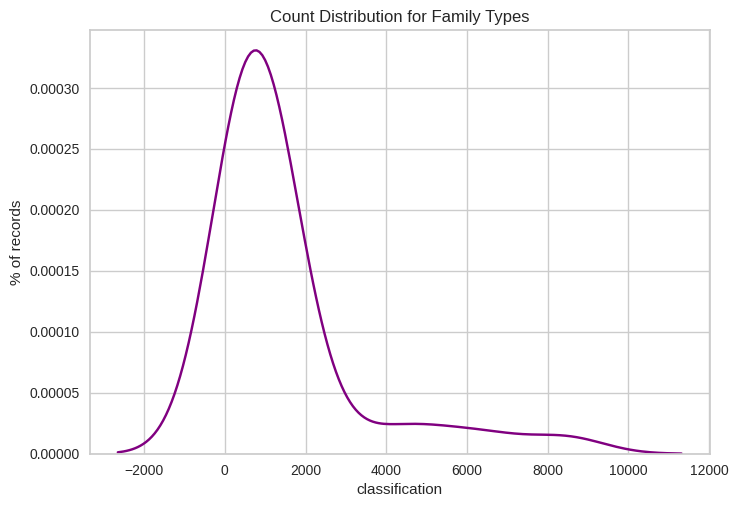

In [201]:
#plot counts
plt.figure()
sns.distplot(counts_2, hist = False, color = 'purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()

3.Modelacion ML

Después de filtrar finalmente el conjunto de datos, se debe realizar una división de los datos para crear un conjunto de entrenamiento y otro de prueba. Después de dividir los datos, es importante se utilizara CountVectorizer para crear un diccionario compuesto a partir del conjunto de datos de entrenamiento. Esto extraerá caracteres individuales o subconjuntos de caracteres para obtener características.

Es importante aclara que en una proteína, no es el aminoácido individual en la proteína lo que da la identificación de cuál es su propósito. Hay estructuras secundarias y terciarias que se forman a través de los enlaces de los aminoácidos en la secuencia. Además, diferentes partes de la cadena pueden ser más básicas y otras más ácidas, lo que indica que es importante utilizar características que sean más amplias que una sola unidad. Como resultado, usar un ngram_range de (4,4) parece ser una elección legítima para la extracción de características. Esto extraerá diferentes subconjuntos que son de longitud 4 permitiendo a los aminoácidos utilizar sus vecinos para ayudar en nuestra clasificación.

In [212]:
##Could add n-grams
## https://stackoverflow.com/questions/18658106/quick-implementation-of-character-n-grams-using-python
##jump_size !=1 -> less overlap in n-grams.
def char_grams(text,n=3,jump_size=2):
    return [text[i:i+n] for i in range(0,len(text)-n+1,jump_size)]

In [213]:
data_m.head(3).sequence.apply(char_grams)

structureId
1A4S    [AQL, LVD, DSM, MPS, SAS, STG, GSV, VVV, VTD, ...
1A6Q    [MGA, AFL, LDK, KPK, KME, EKH, HNA, AQG, GQG, ...
1A72    [STA, AGK, KVI, IKC, CKA, AAV, VLW, WEE, EKK, ...
Name: sequence, dtype: object

In [214]:
data_m["3mers"] = data_m.sequence.apply(char_grams)

In [215]:
data_m.tail()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence,3mers
structureId,,,,,,,,,,
6FFL,SUGAR BINDING PROTEIN,388,1.71,44992.17,291.0,2.59,53.00,5.5,EDVRIQIWHQMIYGHRQVLAEALEKFEKENPGITVQATYRETEELR...,"[EDV, VRI, IQI, IWH, HQM, MIY, YGH, HRQ, QVL, ..."
6FG7,PROTEIN BINDING,500,1.90,56392.64,298.0,3.39,63.68,4.0,MKEIGSKPRKLLPLCFIIFLCFCSSVMAADEDDIRCLRGLKASLTD...,"[MKE, EIG, GSK, KPR, RKL, LLP, PLC, CFI, IIF, ..."
6FG8,PROTEIN BINDING,506,1.25,58478.36,298.0,1.86,33.78,5.5,MTRLTVLALLAGLLASSRAGSSMASANLEGDALHTLRVTLVDPNNV...,"[MTR, RLT, TVL, LAL, LLA, AGL, LLA, ASS, SRA, ..."
6FG8,PROTEIN BINDING,506,1.25,58478.36,298.0,1.86,33.78,5.5,MKKIFITLLWLLFISSFLCSSSSAEDDVLCLQGLKNSLIDPSSRLS...,"[MKK, KIF, FIT, TLL, LWL, LLF, FIS, SSF, FLC, ..."
6FIF,PROTEIN BINDING,837,2.54,93918.31,298.0,3.32,62.96,4.0,MKTFSSFFLSVTTLFFFSFFSLSFQASPSQSLYREIHQLISFKDVL...,"[MKT, TFS, SSF, FFL, LSV, VTT, TLF, FFF, FSF, ..."


In [216]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46422 entries, 1A4S to 6FIF
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classification            46422 non-null  object 
 1   residueCount              46422 non-null  int64  
 2   resolution                46422 non-null  float64
 3   structureMolecularWeight  46422 non-null  float64
 4   crystallizationTempK      46422 non-null  float64
 5   densityMatthews           46422 non-null  float64
 6   densityPercentSol         46422 non-null  float64
 7   phValue                   46422 non-null  float64
 8   sequence                  46422 non-null  object 
 9   3mers                     46422 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 4.9+ MB


In [217]:
data_m.describe(include="all")

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence,3mers
count,46422,46422.000000,46422.000000,4.642200e+04,46422.000000,46422.000000,46422.000000,46422.000000,46422,46422
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44762,44491
top,HYDROLASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFA...,"[MQI, IFV, VKT, TLT, TGK, KTI, ITL, LEV, VEP, ..."
freq,8466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,16
mean,NaN,858.969907,2.186390,9.730842e+04,291.044358,2.704024,51.934464,6.800570,NaN,NaN
std,NaN,1331.761893,0.583336,1.512602e+05,8.547038,0.732436,10.076324,1.352036,NaN,NaN
min,NaN,6.000000,0.480000,7.447300e+02,4.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,296.000000,1.800000,3.376576e+04,290.000000,2.230000,44.900000,6.000000,NaN,NaN
50%,NaN,506.000000,2.100000,5.727849e+04,293.000000,2.520000,51.070000,7.000000,NaN,NaN
75%,NaN,916.000000,2.500000,1.031324e+05,295.000000,2.950000,58.240000,7.500000,NaN,NaN


Guardando el csv en un archivo

In [218]:
## Guardando el csv en un archivo
data_m.to_csv("protein_classification_46k_ngrams.csv.gz",compression="gzip")

 ----- Train Test Split -----

In [220]:

# Split Data
X_train, X_test,y_train,y_test = train_test_split(data_m['sequence'], data_m['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)


In [ ]:
#Print a few of the features
print(vect.get_feature_names()[-20:])

# 3.Ml Modelos usanso sckitlear

Una vez extraídas las características, es hora de utilizar modelos de aprendizaje automático. Tradicionalmente,se usara un enfoque de Naive Bayes,

In [221]:
# 4). ------ Machine Learning Models ------

# Make a prediction dictionary to store accuracys
prediction = dict()

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)
print( prediction['MultinomialNB'])

0.5542272482498654


In [222]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)
ADA_pred = model.predict(X_test_df)
prediction["Adaboost"] = accuracy_score(ADA_pred , y_test)
print(prediction["Adaboost"])

0.2555735056542811


Al observar el accuracy_score en ambos modelos de clasificacion parece indicaer que Naive Bayes obtiene mejores resultados de clasificación que Adaboost.

A partir de los anterioes resultados se procede a relializar la visualización de una matriz de confusión y de un informe de clasificación para la predicción de Naive Bayes que puede ayudar a determinar dónde el modelo funciona mal.

# 4.Metricas

In [224]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = types)

<Axes: >

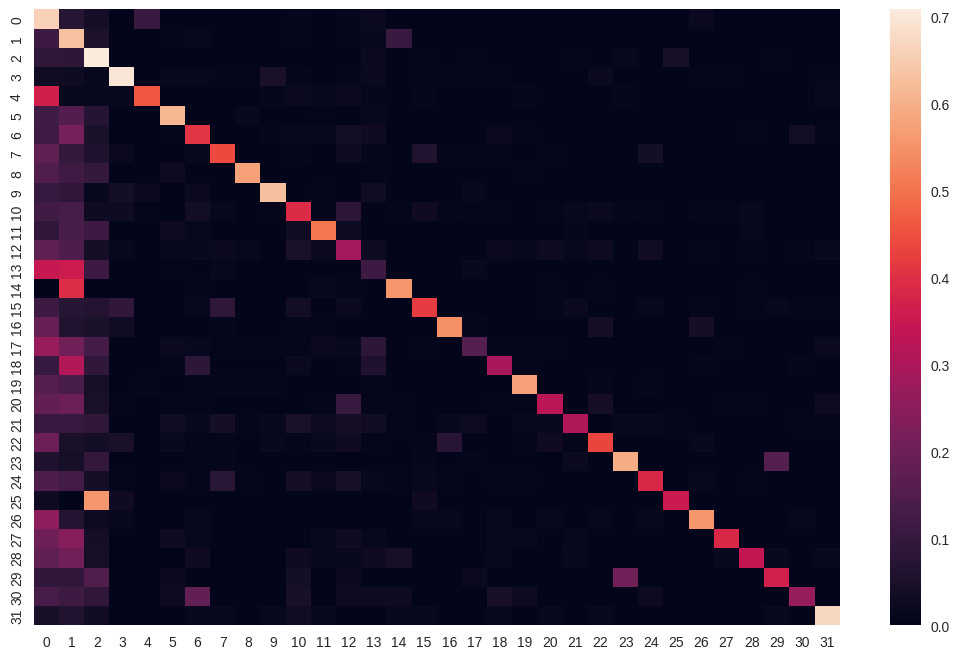

In [225]:
# 5). ----- Plot Confusion Matrix for NB -----

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = types)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

La matriz de confusión muestra que la etiqueta índice 3 se clasifica erróneamente como índice 38 en bastantes ocasiones. Teniendo en cuenta los nombres que figuran a continuación, es lógico que se confundan.

In [226]:
print(types[3])
print(types[38])

IMMUNE SYSTEM


IndexError: ignored

##  informe de clasificación

El informe de clasificación forma de evaluar el rendimiento del modelo de clasificación. Muestra las puntuaciones de precisión, recuperación, f1 y soporte del modelo.

In [227]:
#Print F1 score metrics
print(classification_report(y_test, NB_pred, target_names = types))

                                         precision    recall  f1-score   support

                              HYDROLASE       0.57      0.43      0.49       143
                            TRANSFERASE       0.47      0.34      0.39        68
                         OXIDOREDUCTASE       0.67      0.57      0.62        94
                          IMMUNE SYSTEM       0.58      0.67      0.62        64
          HYDROLASE/HYDROLASE INHIBITOR       0.45      0.29      0.36       119
                                  LYASE       0.66      0.59      0.63       116
                          TRANSCRIPTION       0.28      0.27      0.27        45
                      TRANSPORT PROTEIN       0.53      0.66      0.59      1649
                              ISOMERASE       0.37      0.46      0.41       240
                          VIRAL PROTEIN       0.90      0.70      0.79       831
                      SIGNALING PROTEIN       0.85      0.57      0.69       256
                           

Sensibilidad_recall: tasa de verderos positivos
Precision:Desviacion del modelo de los resultados deseados.

En general el modelo de NAVE BAYLES implementado tiene un metricas ......................


Las Razones del error de modelo,puede deducirse que considerando que una seciencia lote de proteínas tienden a compartir características muy similares esto se observa en cadenas de aminoaciso simialres de cual solo varia una letra, eso pued einducir la conformacion de estructuras similares, ya que se dirigirán a zonas muy parecidas. Esto se refleja en la matriz de confusión y en el mapa de calor. Las proteínas reguladoras de genes tendrán una similitud con las proteínas de unión al ARN, las proteínas de unión al ADN y las proteínas de transcripción.

También hay que tener en cuenta que el modelo sólo utiliza características de 4 aminoácidos como máximo. La posibilidad de utilizar aminoácidos de mayor grado en teoría debería poder crear una precisión aún mayor.

Como prespetivas futuras se posibilita que el modelo puede mejorarse, Utilizando factores como el pH, el peso molecular y otros componentes que aporten más información sobre la familia. Además, es posible, aumentar la longitud del ngram_range para incluir más de 4 caracteres y permitir una mayor interacción entre los aminoácidos.